Tim Gurner, an Australian millionaire and property mogul, advised millenials not to drink Starbucks nor to eat avocado toasts should they want to purchase a house. I like avocado toasts, so it is interesting to see whether the avocado prices fluctuate across different regions in the US, so that I may move to a region with lower avocado prices so I can continue eating avocado toasts without any guilts. 

This data set is from Hass Avocado Board (http://www.hassavocadoboard.com/retail/volume-and-price-data) that records average prices of conventional and organic avocado in different regions from December 2014 to April 2018. The goal of this exercise is to forecast avocado prices in different regions given historical average avocado prices by region and by type (i.e., conventional vs. organic). 

The key takeaways from this exercise include:

**1. Prophet for forecasting time series data**

Prophet is open source software released by Facebook's Core Data Science team. It is used to forecast time series with data based on an additive model where non-linear trends are fit with seasonality and holiday effects. Since avocado is an agricultural product and should have strong seasonal effects with a lot of historical data, it is reasonable to use Prophet to predict futre prices of avocado. 

** 2. Increasing avocado prices**

In general, regardless of seasonal effects, avocado prices have increased strongly from late 2017 to mid 2018. It is because the California avocado harvests are down by 44% due to changes in weather while the demand for avocado is constantly high with the wide media coverage on benefits of avocados. 



** 3. Avocado prices vary greatly by region **

Prices of avocado vary significantly by region. For example, organic avocados, on average, are cheaper than ones in San Diego and will continue getting cheaper. 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
import statsmodels.api as sm

In [134]:
avocado = pd.read_csv('avocado.csv')

In [135]:
#avocado.info()

In [136]:
for i in avocado.columns: 
    print('number of {}: {}'.format(i, len(avocado[i].value_counts().index)))

number of Unnamed: 0: 53
number of Date: 169
number of AveragePrice: 259
number of Total Volume: 18237
number of 4046: 17702
number of 4225: 18103
number of 4770: 12071
number of Total Bags: 18097
number of Small Bags: 17321
number of Large Bags: 15082
number of XLarge Bags: 5588
number of type: 2
number of year: 4
number of region: 54


In [139]:
avocado['Date'] = pd.to_datetime(avocado['Date'])

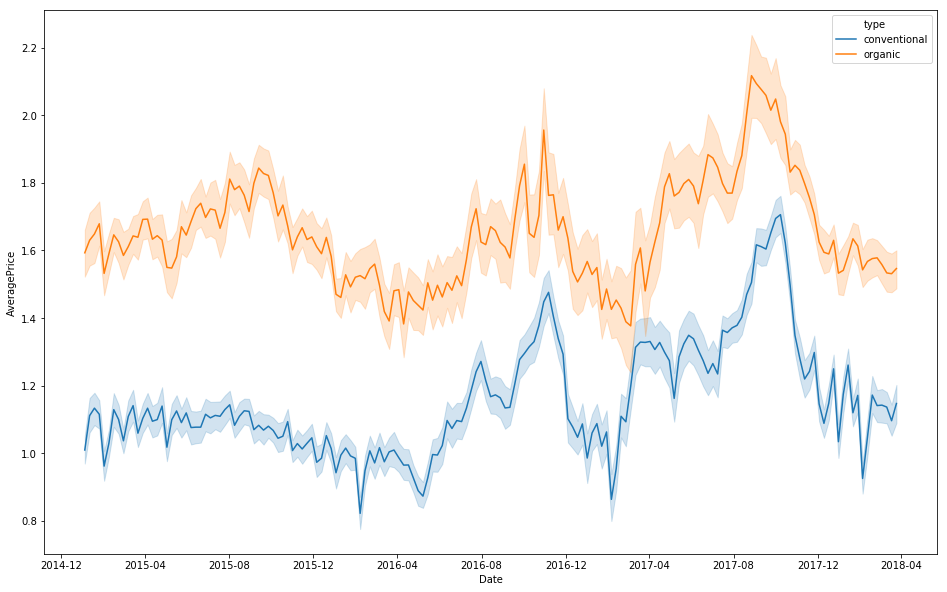

In [141]:
plt.figure(figsize=(16, 10))
sns.lineplot(x = 'Date', y = 'AveragePrice', data = avocado, hue = 'type')
plt.show()

As shown above, organic avocados are significantly more expensive than conventional ones. Indeed, organic avocados are about 60% more expensive than conventional avocados. Thus, one way to spend less on avocados is to purchase conventional avocados than organic ones.

Assuming that I still want organic avocados. I would like to predict future prices of organic avocados in different regions provided. I will use Profet and see the forecasted organic avocados prices for 'TotalUS'

In [147]:
#List all regions: Each region has 169 date and 2 types of avocado each date -> how to verify? 
avocado['region'].value_counts().index

Index(['Portland', 'Tampa', 'Pittsburgh', 'NewYork', 'West', 'GrandRapids',
       'PhoenixTucson', 'SouthCarolina', 'Plains', 'Syracuse',
       'CincinnatiDayton', 'SanDiego', 'Northeast', 'Columbus',
       'NorthernNewEngland', 'RichmondNorfolk', 'Louisville',
       'RaleighGreensboro', 'SanFrancisco', 'Boise', 'Nashville', 'GreatLakes',
       'MiamiFtLauderdale', 'Seattle', 'Denver', 'Philadelphia', 'Houston',
       'Chicago', 'NewOrleansMobile', 'California', 'Jacksonville',
       'LosAngeles', 'Detroit', 'TotalUS', 'Midsouth', 'Orlando',
       'BaltimoreWashington', 'BuffaloRochester', 'Atlanta', 'Roanoke',
       'StLouis', 'Charlotte', 'HarrisburgScranton', 'LasVegas',
       'Indianapolis', 'Boston', 'Sacramento', 'Spokane', 'Southeast',
       'Albany', 'HartfordSpringfield', 'DallasFtWorth', 'SouthCentral',
       'WestTexNewMexico'],
      dtype='object')

In [149]:
from fbprophet import Prophet

In [167]:
organic_totalUS = avocado[(avocado['type'] == 'organic')  & (avocado['region'] == 'TotalUS')][['Date','AveragePrice']]

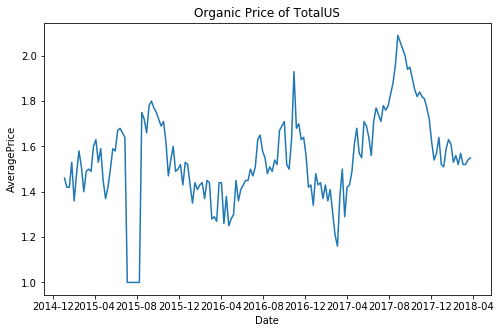

In [179]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = 'Date', y = 'AveragePrice', data = organic_totalUS)
plt.title('Organic Price of TotalUS')
plt.show()

In [188]:
organic_totalUS = organic_totalUS.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


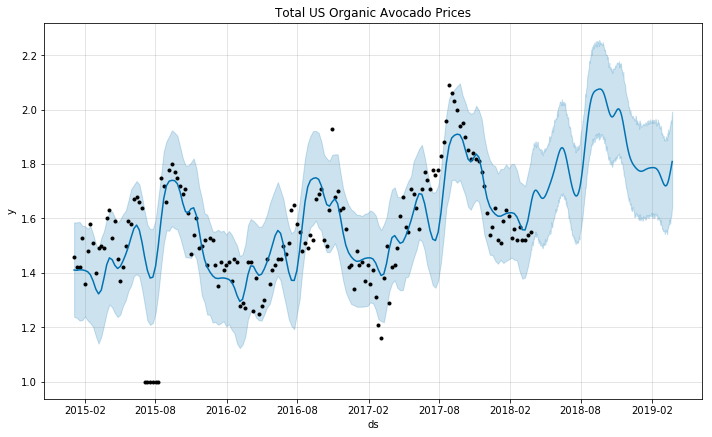

In [197]:
m = Prophet()
m.fit(organic_totalUS)
future = m.make_future_dataframe(periods=365)
#future.tail()
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
plt.title('Total US Organic Avocado Prices')
plt.show()

As shown in the graph above, the average prices of organic avocados will decrease and increase during a 4 - month time frame then change direction.

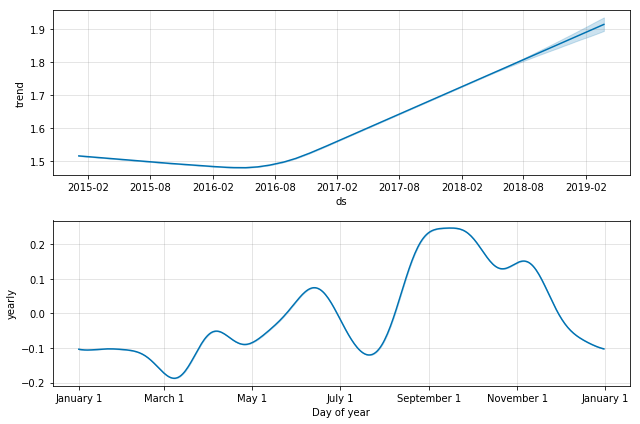

In [201]:
fig2 = m.plot_components(forecast)
plt.show()

The trend plot on the top shows narrow uncertainty intervals, which assume that the future pertains the same frequency and magnitude of rate changes in the past. 

In [206]:
def avocado_region(region, avocado_type): 
    df = avocado[(avocado['type'] == avocado_type)  & (avocado['region'] == region)][['Date','AveragePrice']]
    df = df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    #future.tail()
    forecast = m.predict(future)
    #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    fig1 = m.plot(forecast)
    plt.title('{} Avocado Prices in {}'.format(avocado_type, region))
    plt.show()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


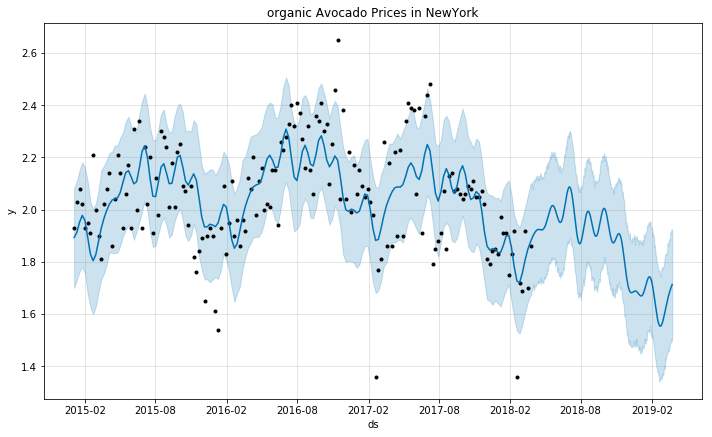

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


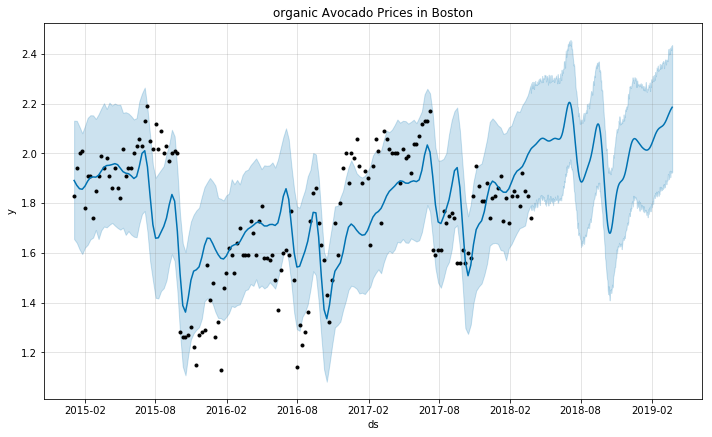

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


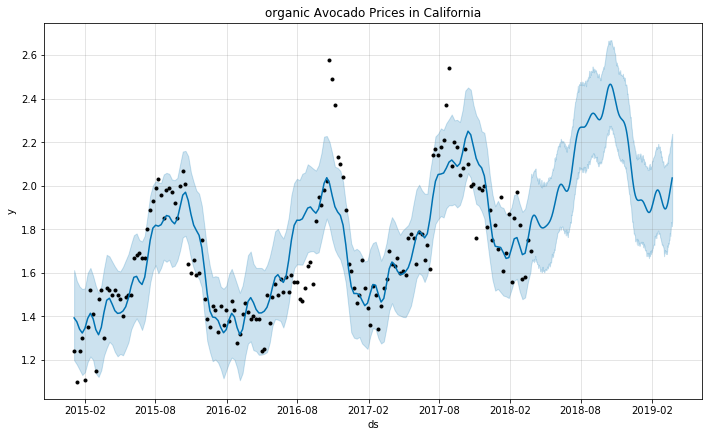

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


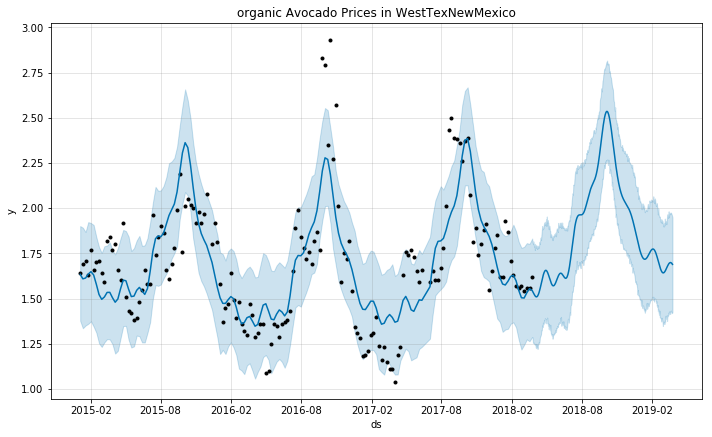

In [209]:
avocado_region('NewYork', 'organic')
avocado_region('Boston', 'organic')
avocado_region('California', 'organic')
avocado_region('WestTexNewMexico', 'organic')